In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CAM_MODE = False
# cam = cv2.VideoCapture(0)

Image_path = './Img/Img_extarct_output.jpg'

img = cv2.imread(Image_path)
print(img.shape)

img_final = None

# 2480 x 3508   // 3.44 =>> 720 x 1020 || 640, 900 || 1080 x 1530
width, height = 1080, 1530

img = cv2.resize(img, (width, height))

Threshold, MaxThreshold = 185, 220

(900, 640, 3)


In [5]:
def display(im_data):
    dpi = 80
    # im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

(1530, 1080)


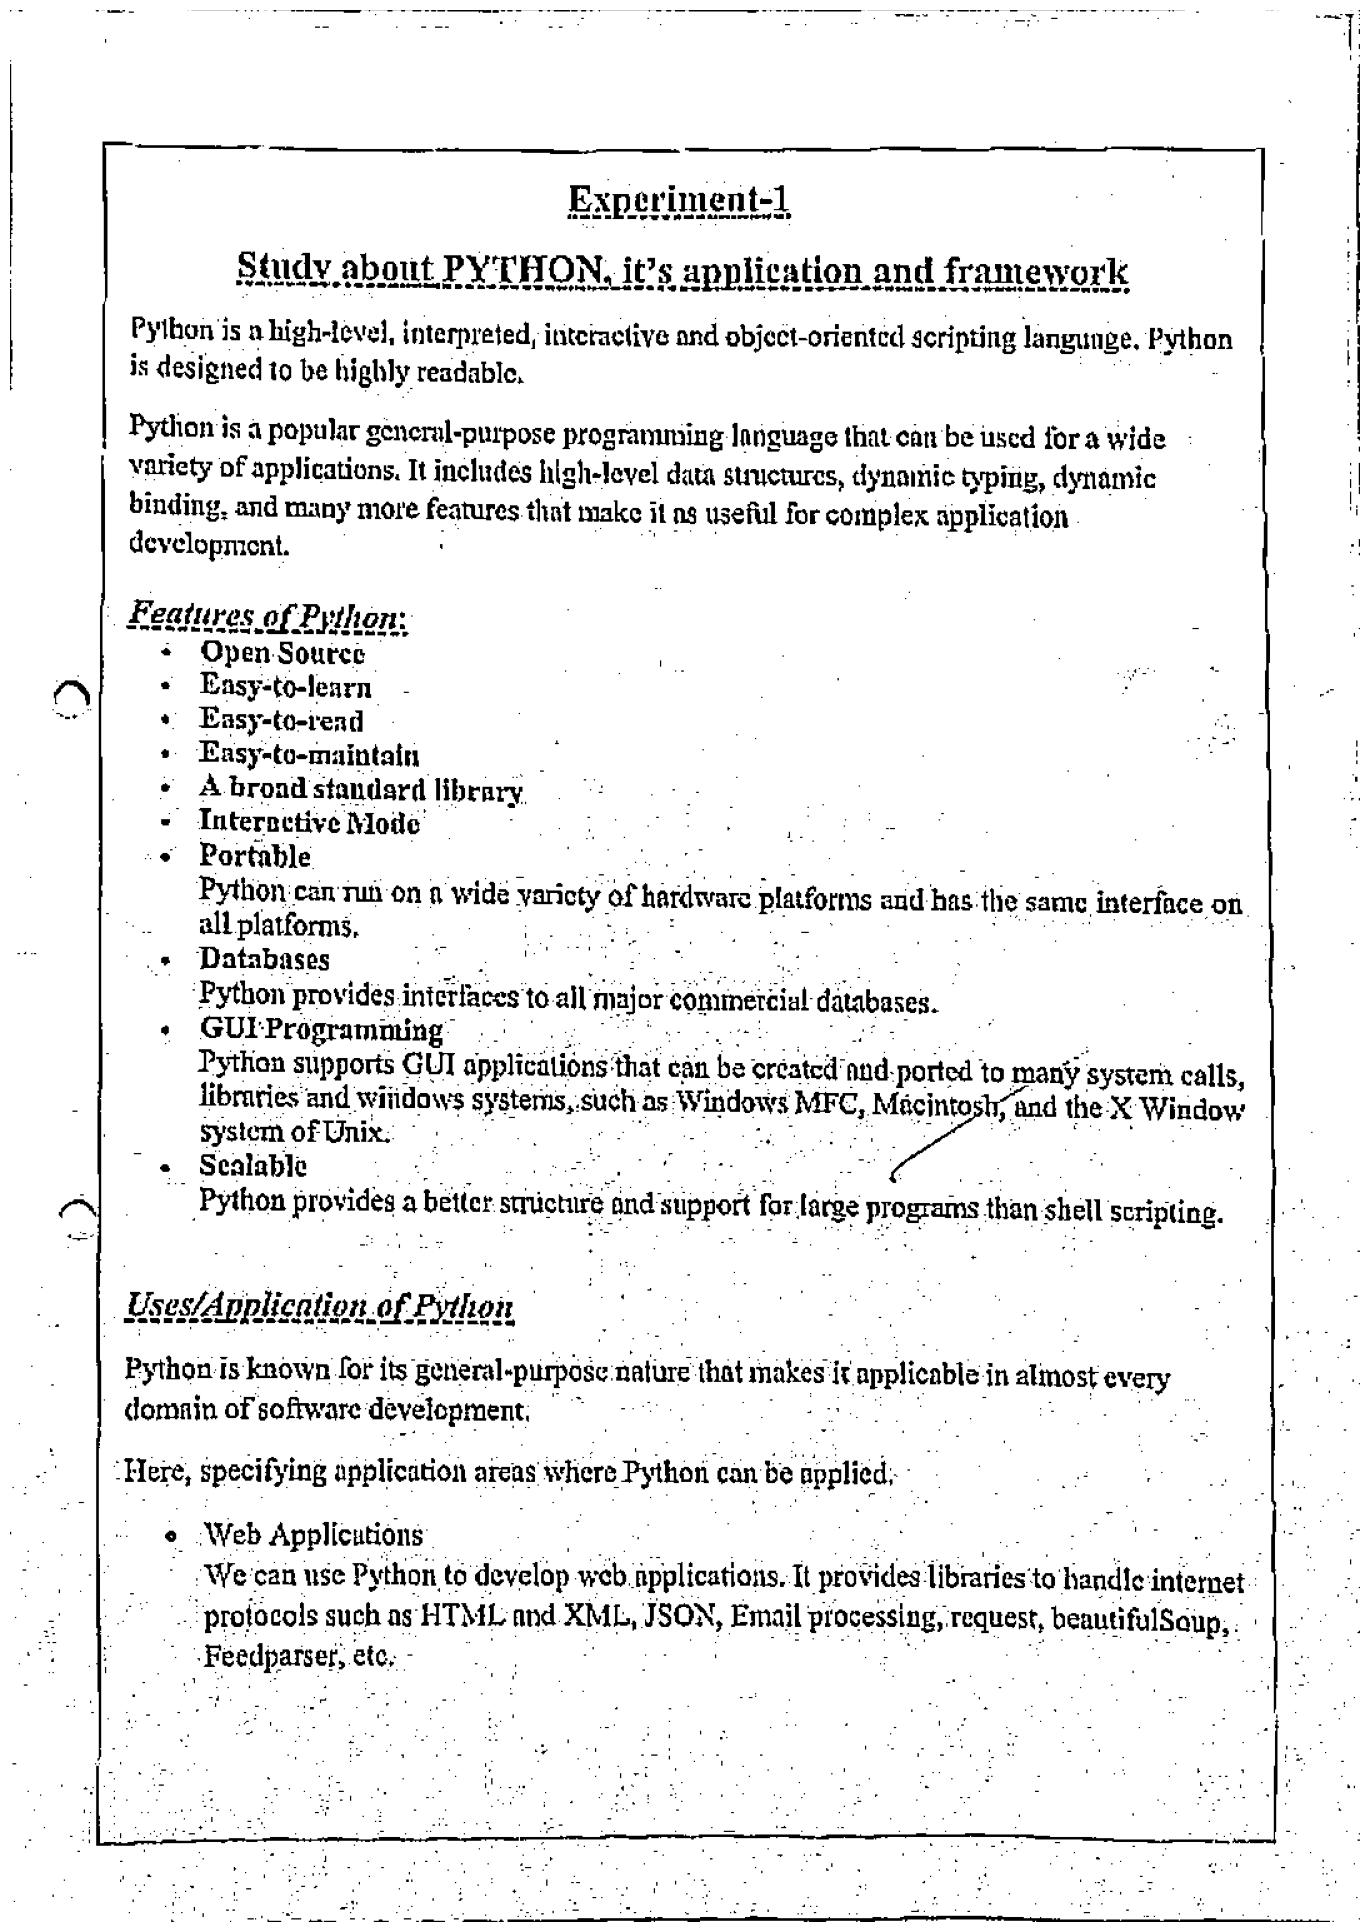

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# thresh, im_bw = cv2.threshold(img_gray, 150, 240, cv2.THRESH_BINARY)
im_bw = cv2.adaptiveThreshold(img_gray, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 4)

print(im_bw.shape)
display(im_bw)

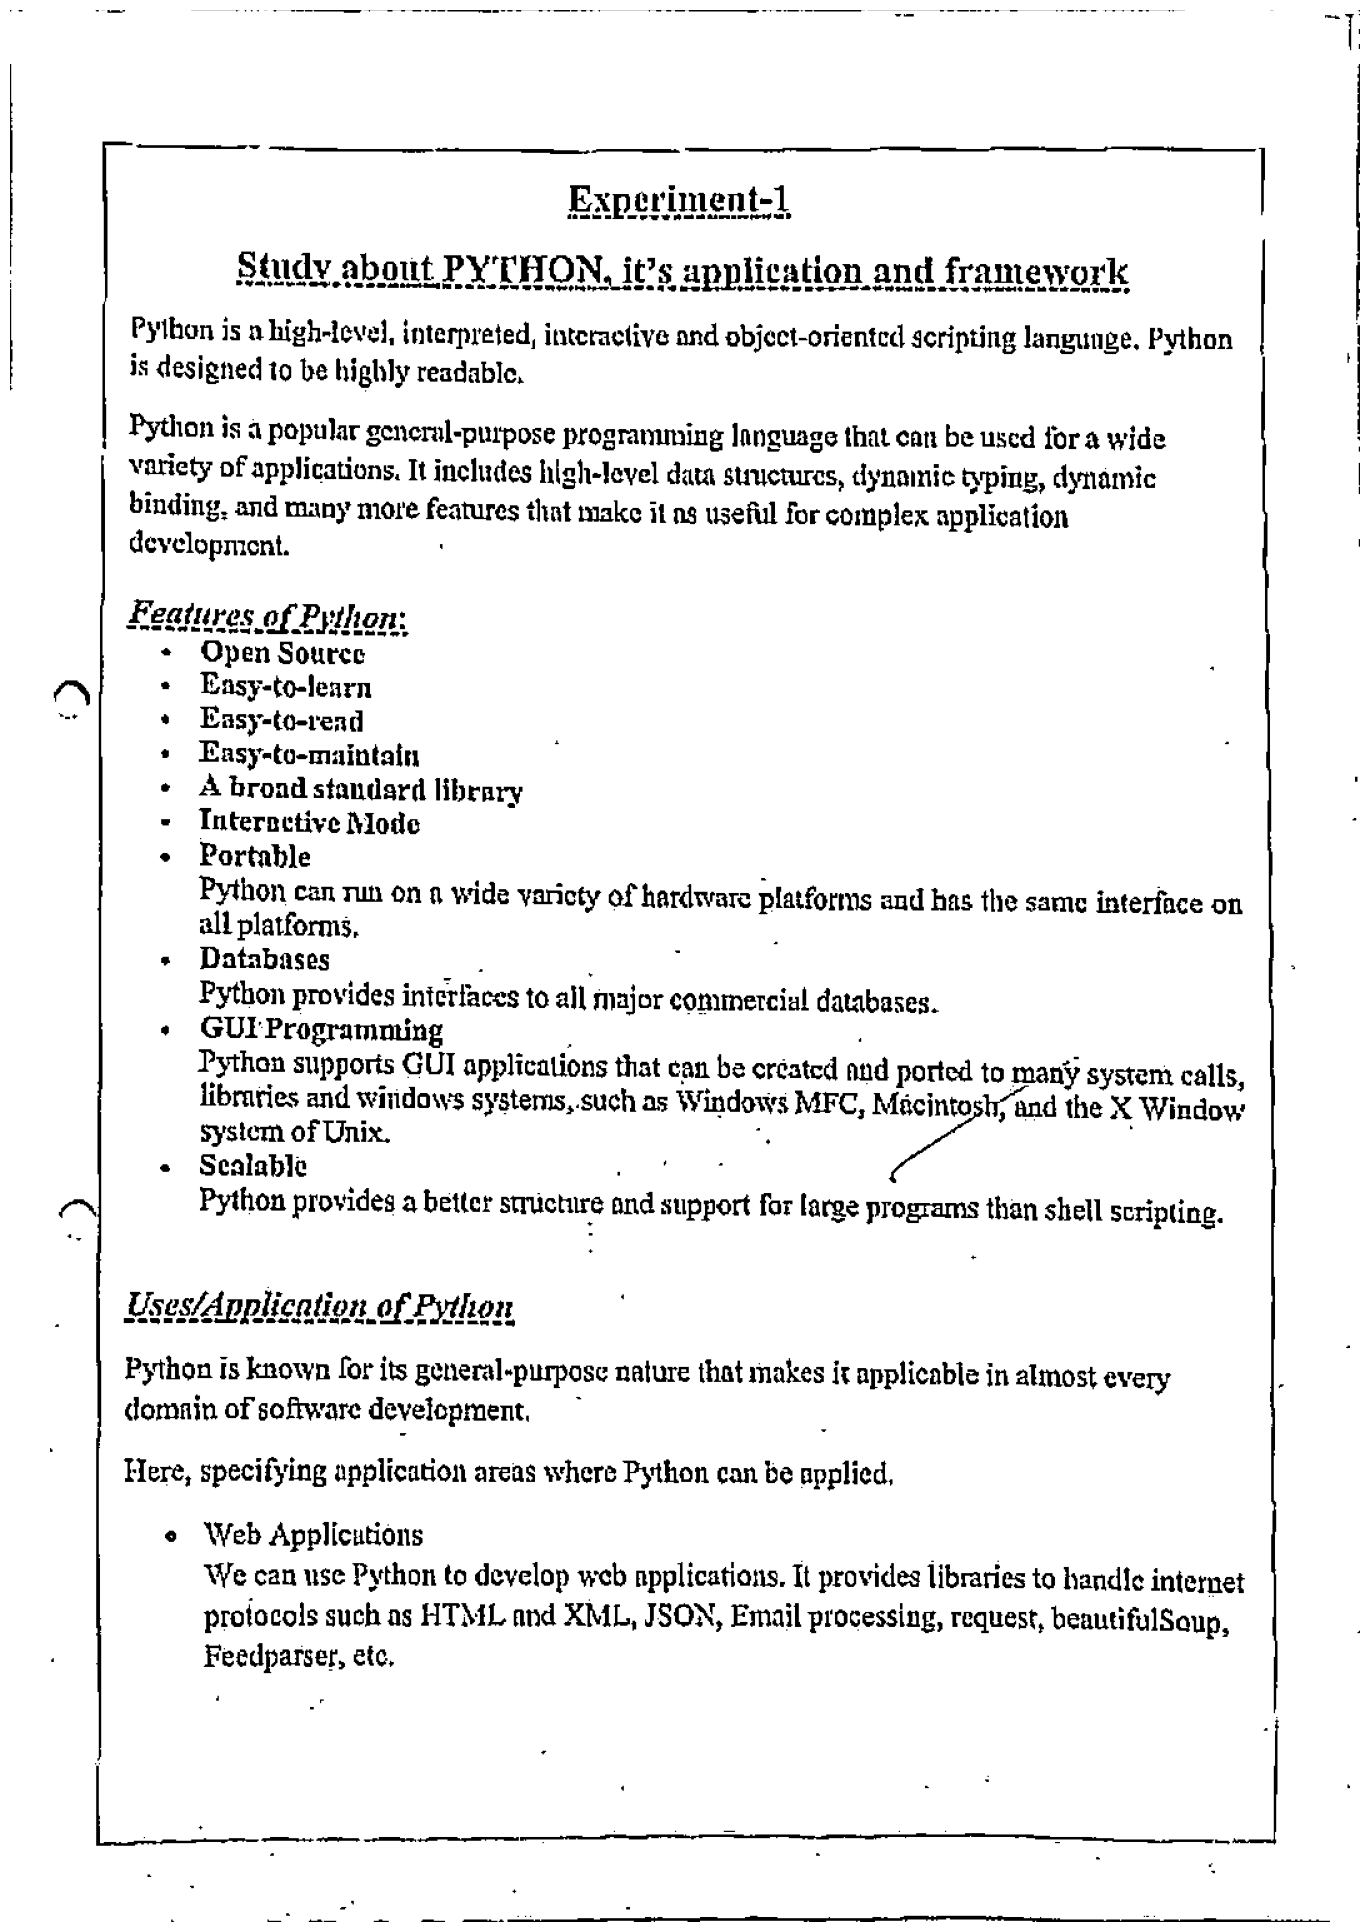

In [7]:
def noise_removal(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    
    image_blured = cv2.medianBlur(image, 3)
    kernel = np.ones((7,3), np.uint8)
    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,3))
    image_final_ = cv2.dilate(image_blured, kernel, iterations=1)

    image_final = cv2.bitwise_and(image,image_final_)
    image_final = cv2.bitwise_not(image_final)
    return (image_final)

img_no_noise = noise_removal(im_bw)
display(img_no_noise)

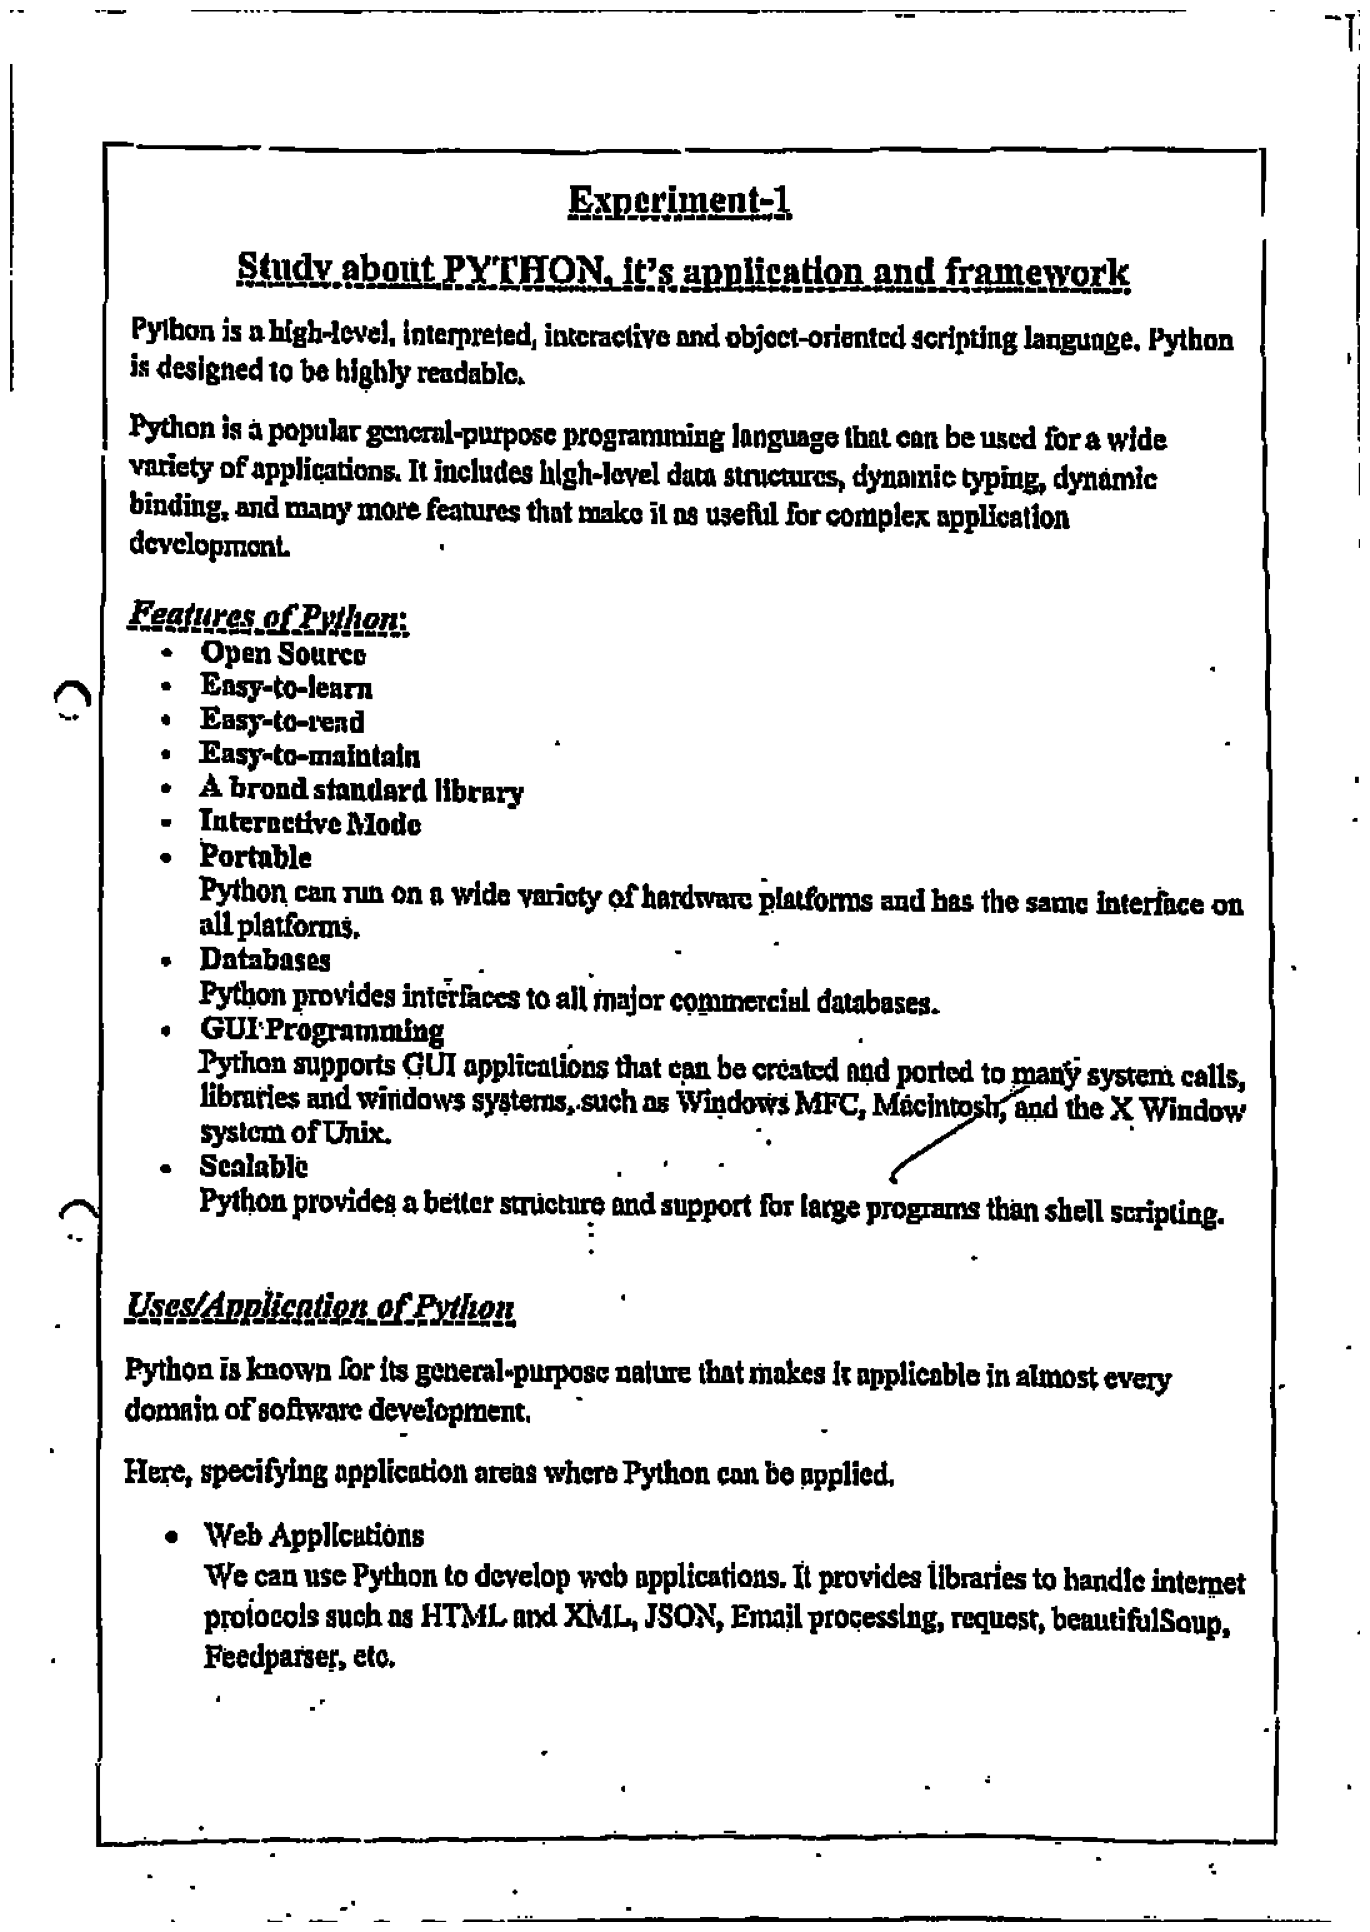

In [8]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

dilated_image = thick_font(img_no_noise)

display(dilated_image)

In [9]:
import pytesseract
from pytesseract import Output as PyTe_OUT


In [10]:
img_config = r"--psm 11 --oem 3"

ocr_result = pytesseract.image_to_data(img_no_noise, config=img_config, output_type = PyTe_OUT.DICT)

txt = ocr_result['text']

In [11]:
txtx = [i for i in txt if i != ""] 

In [12]:
for i in txtx:
    print(i)

Ty
>
Study
about
PYTHON,
it’s
application
and
framework
eee:
Python
is
a
high-level,
interpreted,
interactive
and
object-oriented
scripting
langunge.
Python
is
designed
to
be
highly
readable,
Python
is
a
popular
general-purpose
programming
language
that
can
be
used
fora
wide
variety
of
applications.
It
includes
high-level
data
structures,
dynamic
typing,
dynamic
binding,
and
many
more
features
that
make
it
ng
usefull
for
complex
application
dcvelopmont.
Fea
SEX
es
of
Python:
wets
SESE
m
Source
Easy-to-learn
Easy-to-rend
Easy-to-maintain
A
broad
standard
library
Interactive
Mode
Portable
Python
can
mun
on
a
wide
variety
of
hardware
platforms
and
has
the
same
interface
on
all
platforms,
Databases
Python
provides
interfaces
to
all
inajor
commercial
databases.
GUI
Programming
Python
supports
GUI
applica!
tions
that
can
be
oréated
and
ported
to
many
system:
calls,
libraties
and
wiridows
systems,
such
as
Windows
MFC,
system
of
Unix.
.
Scalable
oe
the
X
Window
rograms
than
shell
scripting.
Py